# **EMPLOYEE ATTRITION PREDICTION**


---


### **BUSINESS UNDERSTANDING**


#### Problem statement


---


Employee attrition is a critical concern in today's business landscape, with significant
implications for organizations worldwide. High attrition rates result in increased costs, reduced
productivity, and diminished morale. To address this issue, you must understand the underlying
factors driving attrition and develop effective retention strategies. This capstone project focuses
on analyzing the Employee Attrition dataset for a tech company, which provides comprehensive
information on employee demographics, job roles, satisfaction levels, compensation, and
work-life balance. By utilizing data analysis techniques, you can gain valuable insights into the
factors influencing attrition, leading to the proposal of potential solutions.
The impact of high attrition rates extends beyond individual organizations and has
significant economic consequences. Recruiting, hiring, and training new employees entail
substantial costs, compounded by the loss of institutional knowledge. Attrition also disrupts
productivity and hampers organizational growth, affecting economic performance at micro and
macro levels. By exploring the factors contributing to attrition and developing effective retention
strategies, this project contributes to the formulation of robust economic and fiscal policies that
foster stability, productivity, and sustainable growth within the business sector.


#### Main objective


The main objective of the project is to come up with a predictive model that would be able to identify employee who are mostly likely to attrition giving Human resources department the chance to intervene and also improve on some of the policies to ensure that employees are happy.


#### Metric for success


The project will be considered a success if the predictive model has an accuracy of **90%** so that it can successfuly flag employee who are mostly likely to attrition.


### **DATA UNDERSTANDING**


---


This dataset contains information on 1470 employees, with each employee represented as an entry and having 35 different attributes or features. These attributes include: 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.


##### Reading in the data


In [20]:
# importing the required libraries 

import pandas as pd 
import numpy as np 
import pygwalker as pyg
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

In [25]:
# reading in the data 
data = pd.read_csv("Employee_Attrition.csv")

In [6]:
# checking the first few rows of the dataset

data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# checking the last five rows of the data 

data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


##### Data cleaning


In this section, emphasis will be given to :

◍ Checking and Dealing with missing values

◍ Checking for and Dealing with duplicated values

◍ Checking if dataset has appropriate(expected) data types for each of the columns

◍ Checking if there are any redudant columns

◍ Checking dealing with outliers


In [8]:
# checking if the data has missing values 

data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> For the all the columns, it appears as though there are no missing values.


In [9]:
# checking if there are any duplicates in the data 

data.duplicated().sum()

0

> Similarly, there appears as though there are no duplicated values in the data


In [10]:
# checking the column types 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> Some of the columns need to be converted to the right format which will be done later in the analysis before training the model. For example job level and job involvement should be of `object` type


It is also necessary to check the columns to ensure that there are not redudant columns that will not provide any information during analysis. This will be done by checking the unique values for each of the columns


In [14]:
# checking for unique values for each dataframe

def check_unique_values2(dataframe):
    unique_values = []
    for column in dataframe.columns:
        unique_count = dataframe[column].nunique()
        unique_values.append({'Column': column, 'Unique_Count': unique_count})
    return pd.DataFrame(unique_values)


check_unique_values2(data)

,Column,Unique_Count
0,Age,43
1,Attrition,2
2,BusinessTravel,3
3,DailyRate,886
4,Department,3
5,DistanceFromHome,29
6,Education,5
7,EducationField,6
8,EmployeeCount,1
9,EmployeeNumber,1470


From the table,it is evident that `employee count`,`standard hours` and `over18` only one unique values meaning that those columns essentially have the same values all through. They will dropped as they do not provide any information.


In [26]:
# Dropping the redudant columns 

columns_to_drop = ['StandardHours','Over18','EmployeeCount','EmployeeNumber']

data = data.drop(columns=columns_to_drop, axis=1)


It is also important to understand if the numeric columns have outliers so that any extreme values can be dealt with


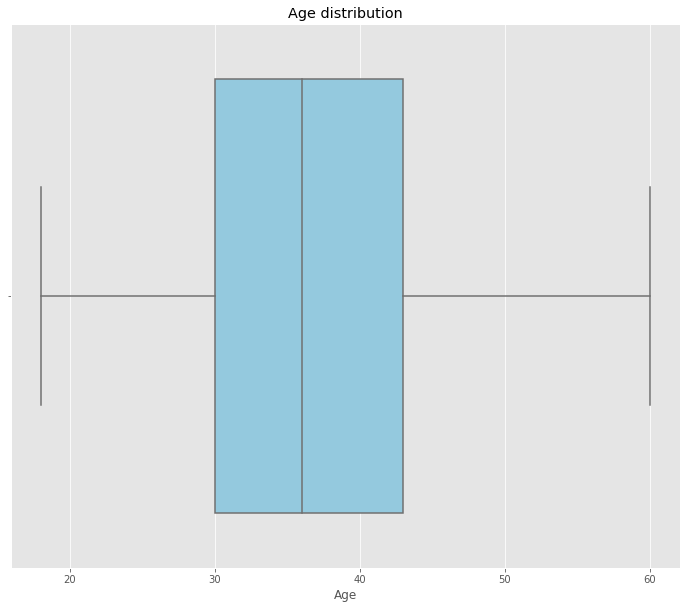

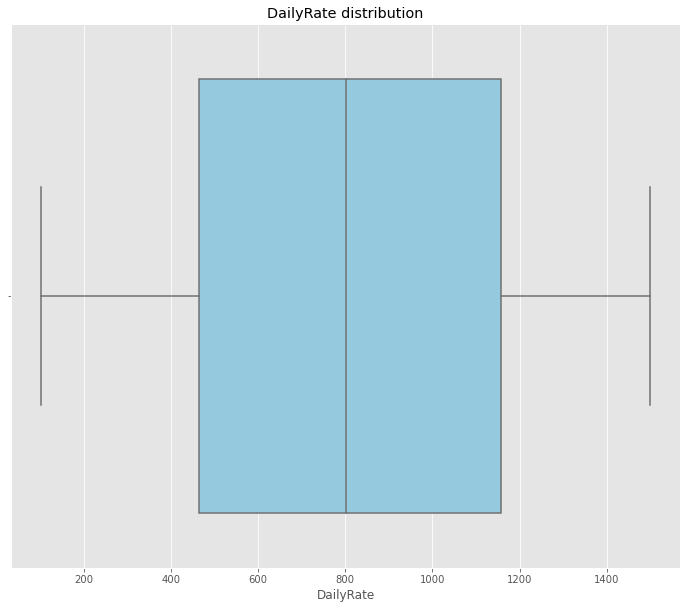

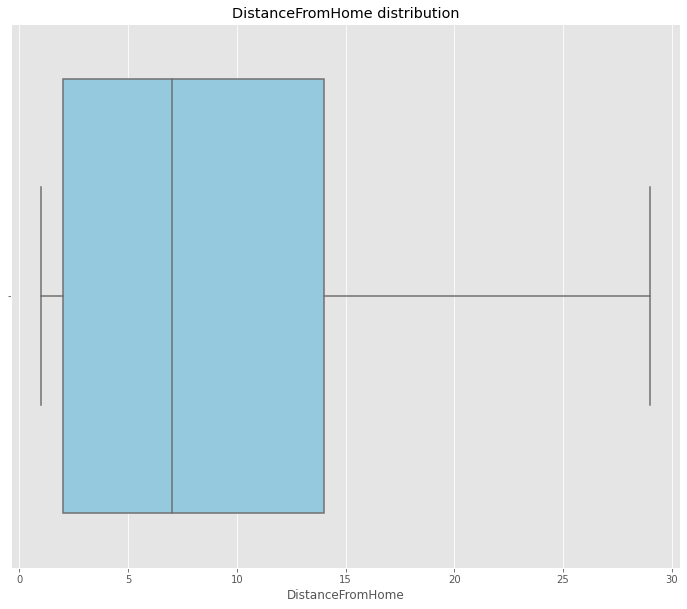

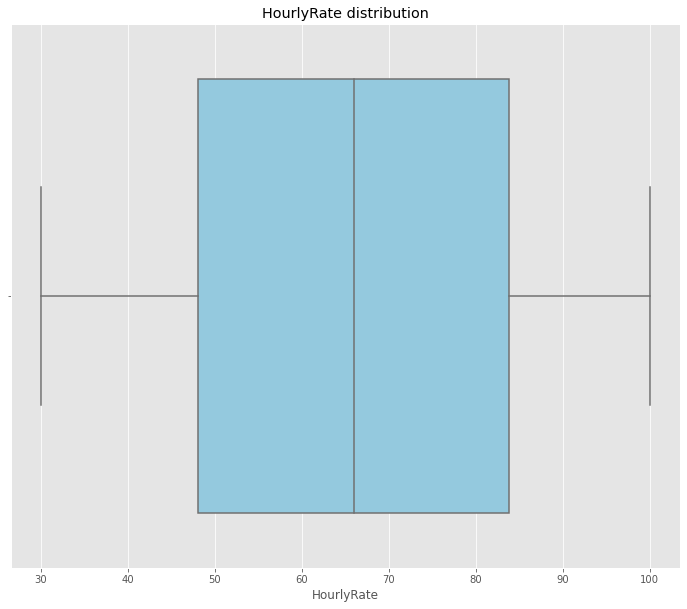

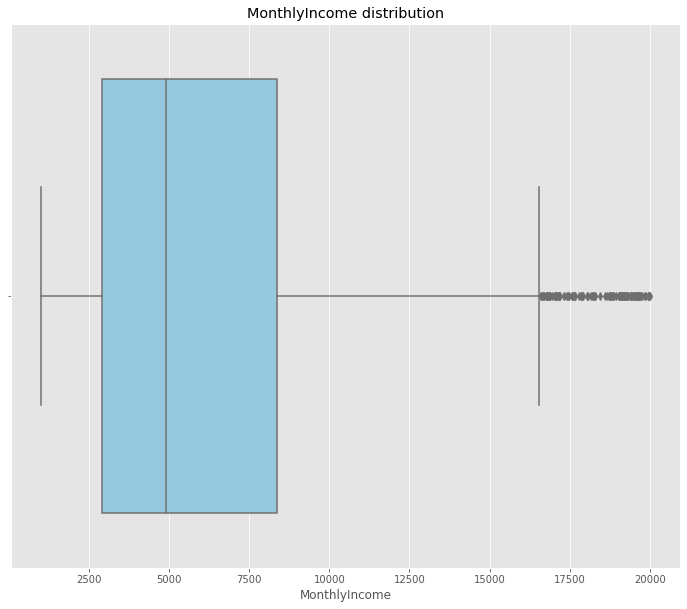

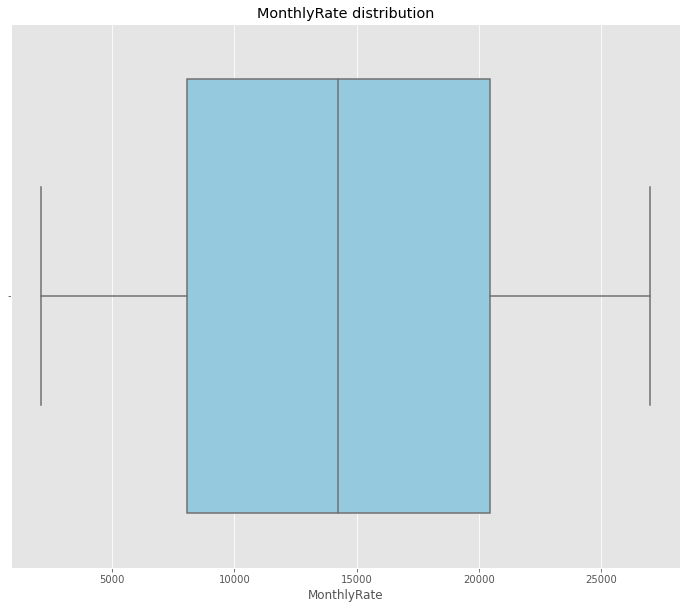

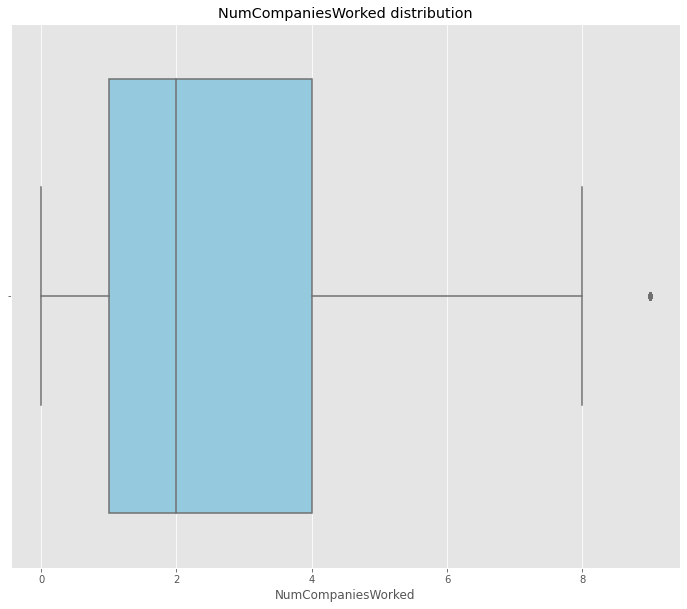

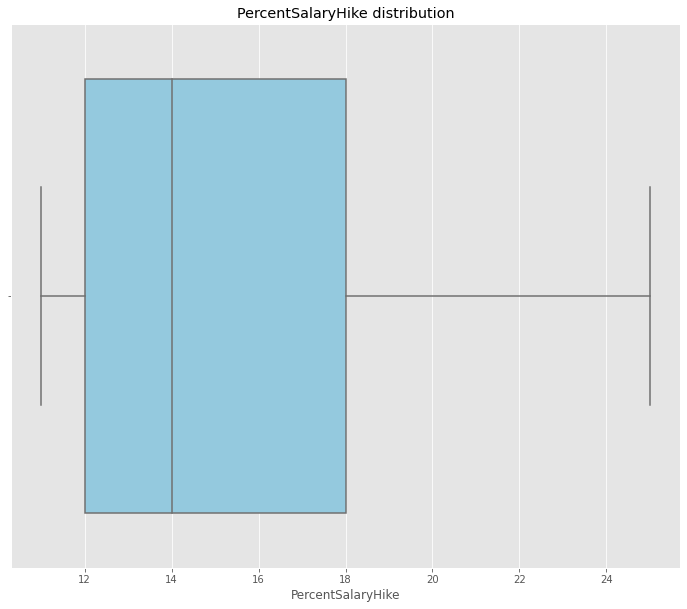

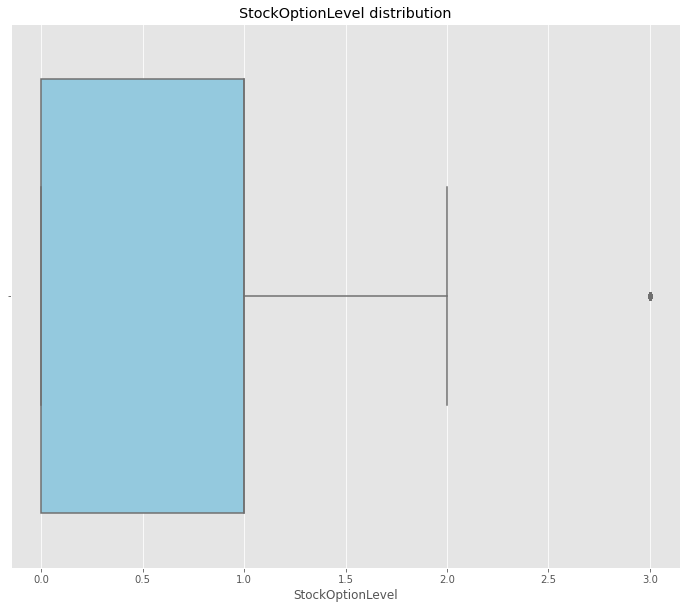

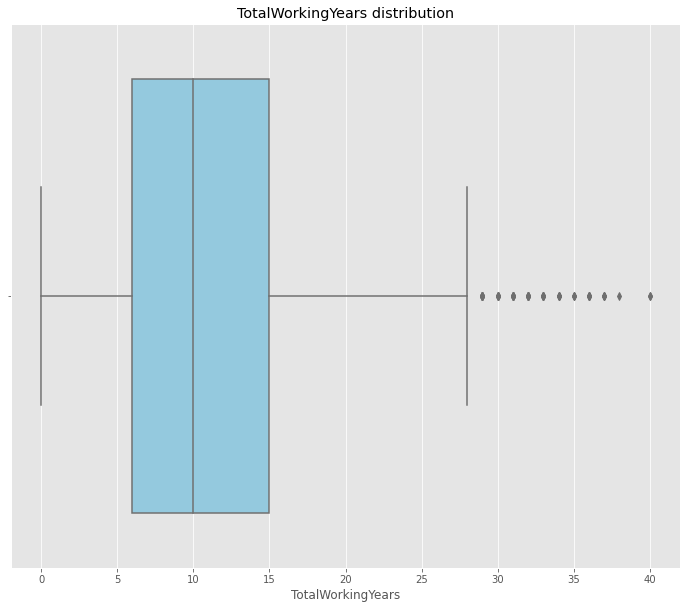

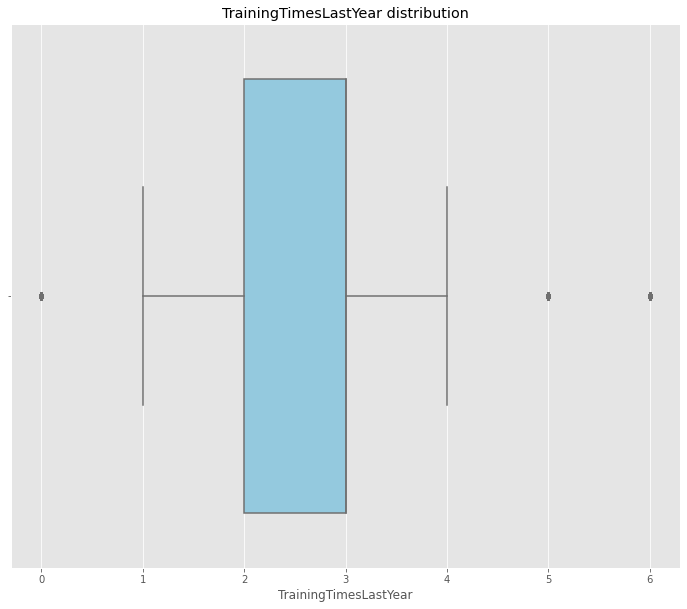

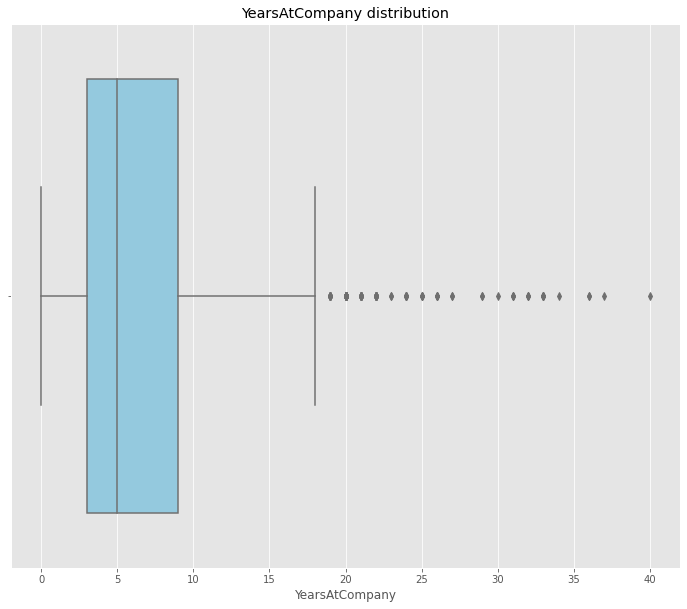

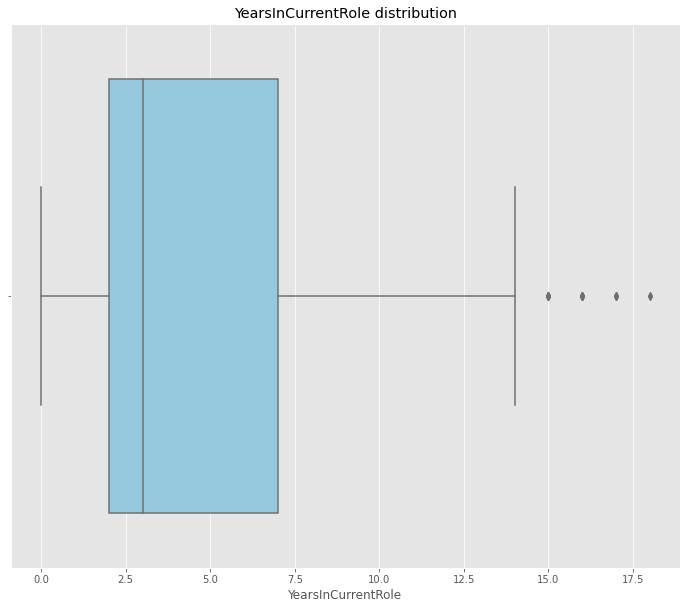

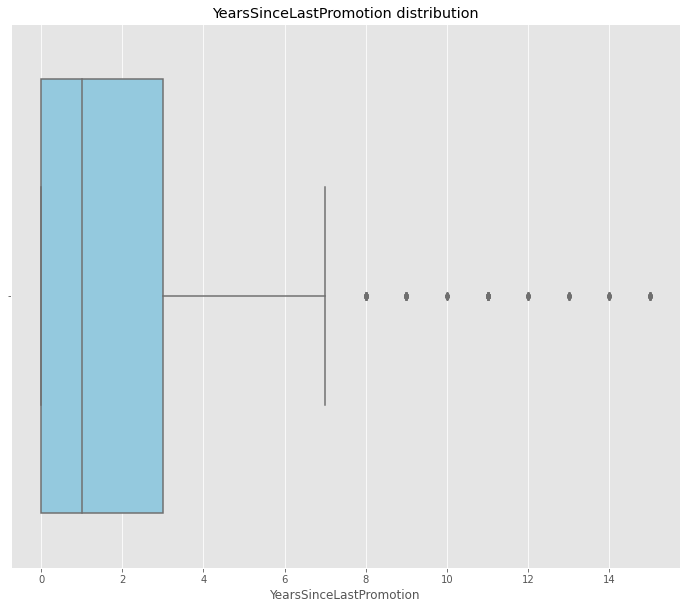

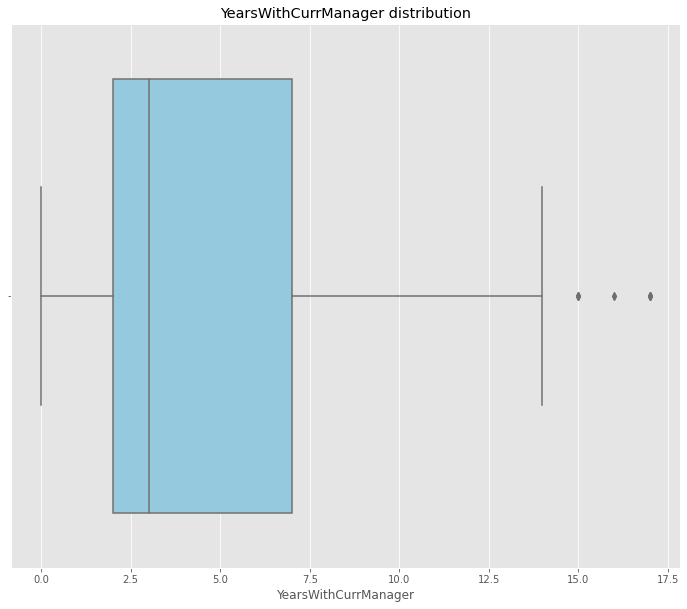

In [32]:
# checking for outliers

numeric_columns = data.select_dtypes('number').columns

columns_to_remove = ['Education','JobInvolvement','JobLevel',
                     'EnvironmentSatisfaction','JobSatisfaction',
                     'WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']

real_numeric_columns = [col for col in numeric_columns if col not in columns_to_remove]

for col in real_numeric_columns:
    plt.figure(figsize=(12,10))
    sns.boxplot(x = data[col],color='skyblue')
    plt.title(f"{col} distribution")
    plt.show()
    

> From the boxplots, it is evident that the some of the columns have outliers. However it is to be noted that many of the outliers do not look extreme are in fact an actual representation of the some of the situations that happen in real life


In [13]:
numeric_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

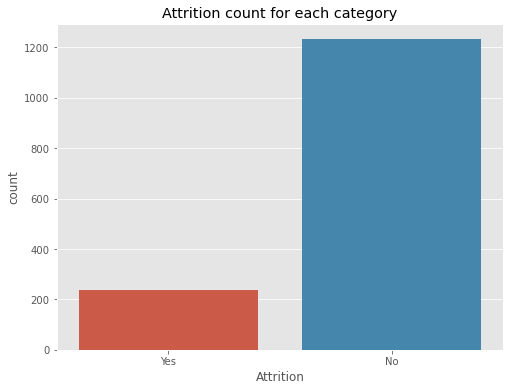

In [9]:
# Attrition count for categories 
plt.figure(figsize=(8, 6))
plt.title('Attrition count for each category')
plt.xlabel('Attrition')
plt.ylabel('Count')
sns.countplot(x="Attrition", data=data)
plt.show()

> As it is visible, it looks like that many of the employees do not quit and only some of the employees actually quit their jobs


This will later present a challenge when modelling where there will be some sort of resampling needed to be done to ensure that the machine learning model is able to learn sufficiently from both categories so that is able to capture the employees that are most likely to leave their jobs and any intervention is taken early enough


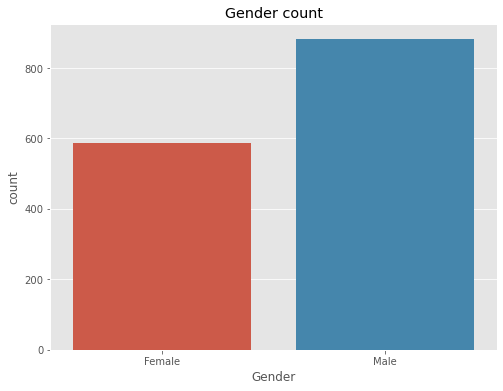

In [19]:
# Gender count 
plt.figure(figsize=(8, 6))
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.countplot(x="Gender", data=data)
plt.show()

## Exploratory Data Analysis


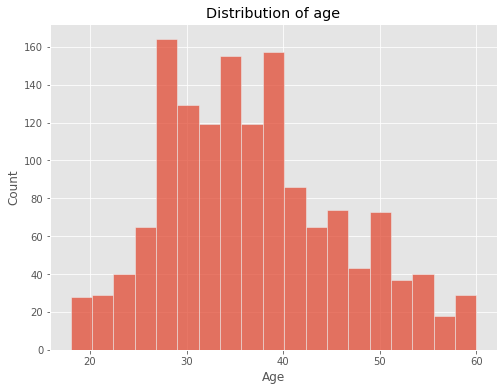

In [12]:
# distribution of age 
plt.figure(figsize=(8, 6))
sns.histplot(x="Age", data = data)
plt.title('Distribution of age')
plt.show()

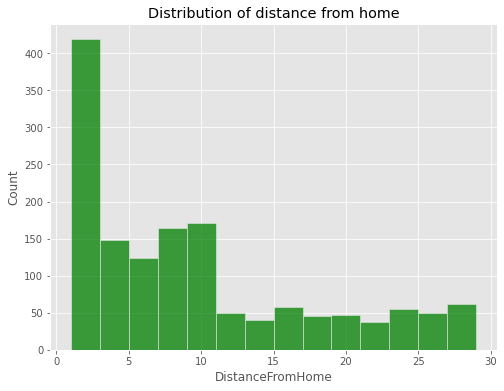

In [14]:
# distribution of distance from home 
plt.figure(figsize=(8, 6))
sns.histplot(x="DistanceFromHome",color='green', data = data)
plt.title('Distribution of distance from home')
plt.show()

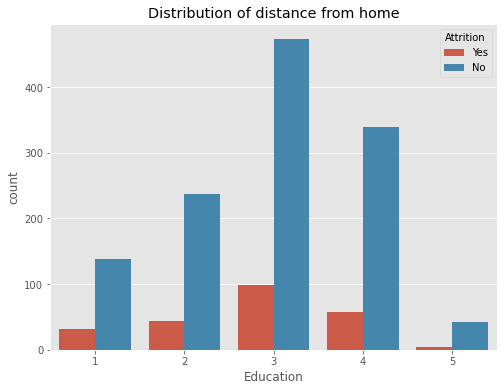

In [5]:
# distribution of distance from home 
plt.figure(figsize=(8, 6))
sns.countplot(x="Education", hue="Attrition", data=data)
plt.title('Distribution of distance from home')
plt.show()

In [13]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
# checking for unique values for each dataframe

def check_unique_values2(dataframe):
    unique_values = []
    for column in dataframe.columns:
        unique_count = dataframe[column].nunique()
        unique_values.append({'Column': column, 'Unique_Count': unique_count})
    return pd.DataFrame(unique_values)


check_unique_values2(data)

,Column,Unique_Count
0,Age,43
1,Attrition,2
2,BusinessTravel,3
3,DailyRate,886
4,Department,3
5,DistanceFromHome,29
6,Education,5
7,EducationField,6
8,EmployeeCount,1
9,EmployeeNumber,1470


In [ ]:
# what are some of the changes

Something else also changed
